In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [ ]:
df.shape

(150000, 53)

In [ ]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Me

**Top 10 handsets used by the customers**

1396 users
Number of posts per user


,count
Handset Type,
Huawei B528S-23A,20323
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520


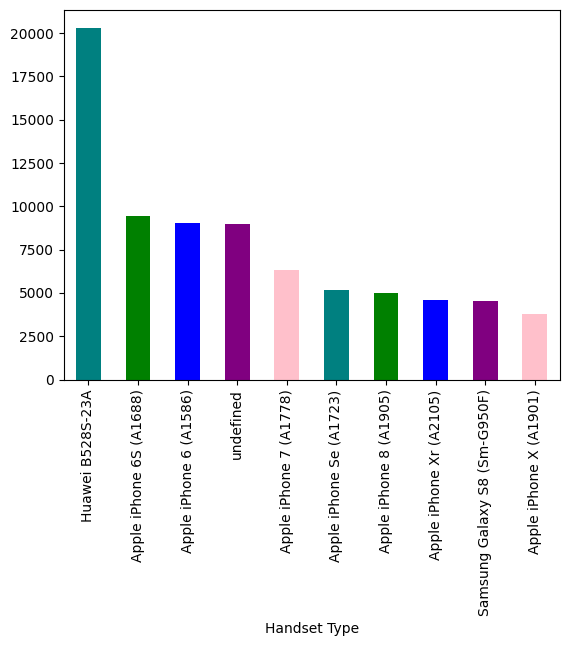

In [ ]:
handset_count = df['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])
handset_count[:10]

**Interpretation:**
1. Most Used Device: The Huawei B528S-23A has the highest usage count, with 20,323 instances. This suggests it's a popular device among your users, likely due to its features or affordability.

2. Apple Dominance: Multiple Apple iPhone models (iPhone 6S, iPhone 6, iPhone 7, SE, 8, XR, X) appear frequently on the list, indicating that Apple devices are widely used among your user base. The iPhone 6S and iPhone 6 are the most common, with usage counts of 9,419 and 9,023 respectively.

3. Undefined Entries: There's an entry labeled "undefined" with 8,987 instances. This could be due to data entry errors, unrecognized devices, or missing information.

4. Samsung Presence: The Samsung Galaxy S8 appears with a usage count of 4,520, showing that Samsung devices also have a significant, though smaller, presence.

**Recommendations:**
1. Focus on Popular Devices: Since Huawei B528S-23A and older iPhone models are highly used, ensure that your services or products are well-optimized for these devices.

2. Address Undefined Entries: Investigate why "undefined" appears in your data. It could indicate an issue with how you're collecting or processing data, leading to incomplete or inaccurate information.

3. Monitor Device Trends: Keep an eye on how the distribution of devices changes over time. If newer models or different brands begin to gain popularity, adjust your focus accordingly to meet users' needs.

4. Consider Device-Specific Marketing: For marketing or product promotions, consider targeting users of the most popular devices (e.g., Huawei B528S-23A, iPhone 6S, etc.) to maximize impact.

**Top 3 handset Manufacturers**

170 users
Number of posts per user


,count
Handset Manufacturer,
Apple,60136
Samsung,40839
Huawei,34423


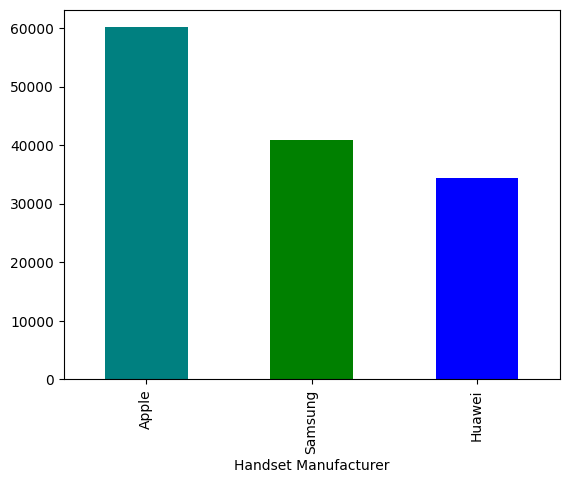

In [ ]:
handset_manufacturer = df['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(kind='bar', color=['teal', 'green', 'blue'])
handset_manufacturer[:3]

**Interpretation:**
1. Apple Leads the Market: With 60,136 users, Apple is the most popular handset manufacturer among your users. This suggests that a significant portion of your user base prefers Apple devices.

2. Strong Samsung Presence: Samsung is the second most popular brand, with 40,839 users. While it's behind Apple, it's still a major player in your user base.

3. Huawei's Competitive Position: Huawei has 34,423 users, making it the third most popular brand. Although it's trailing behind Apple and Samsung, it still commands a significant portion of the market.

**Recommendations:**
1. Prioritize Apple Users: Given that Apple has the largest user base, ensure that your products, services, or apps are fully compatible with Apple devices. Consider offering promotions or features that cater specifically to iPhone users.

2. Cater to Samsung and Huawei Users: Since Samsung and Huawei together make up a large portion of your users (nearly 75,000 combined), it's essential to maintain strong support for these brands. This includes ensuring that your services work seamlessly on these devices and perhaps even offering some brand-specific features.

3. Monitor Market Shifts: Keep track of any changes in the number of users for each manufacturer. If you notice significant growth in one brand (like Huawei gaining on Samsung), adjust your focus accordingly.

4. Diverse Marketing Strategies: Consider tailoring your marketing efforts to highlight the specific advantages or features of your services on Apple, Samsung, and Huawei devices. This can help increase engagement across different segments of your user base.

**Top 5 Handsets per top 3 handset Manufacurers**

In [ ]:
handset_man= df[df['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]
handset = handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()
apple = handset.Apple[:5]
samsung = handset.Samsung[:5]
huawei = handset.Huawei[:5]
report_df = pd.DataFrame({
    'Apple': apple,
    'Samsung': samsung,
    'Huawei': huawei
})
report_df

,Apple,Samsung,Huawei
Handset Type,,,
Apple iPhone 6 (A1586),9023.0,NaN,NaN
Apple iPhone 6S (A1688),9419.0,NaN,NaN
Apple iPhone 7 (A1778),6326.0,NaN,NaN
Apple iPhone 8 (A1905),4993.0,NaN,NaN
Apple iPhone Se (A1723),5187.0,NaN,NaN
Huawei B528S-23A,NaN,NaN,19752.0
Huawei E5180,NaN,NaN,2079.0
Huawei P20,NaN,NaN,1480.0
Huawei P20 Lite Huawei Nova 3E,NaN,NaN,2021.0


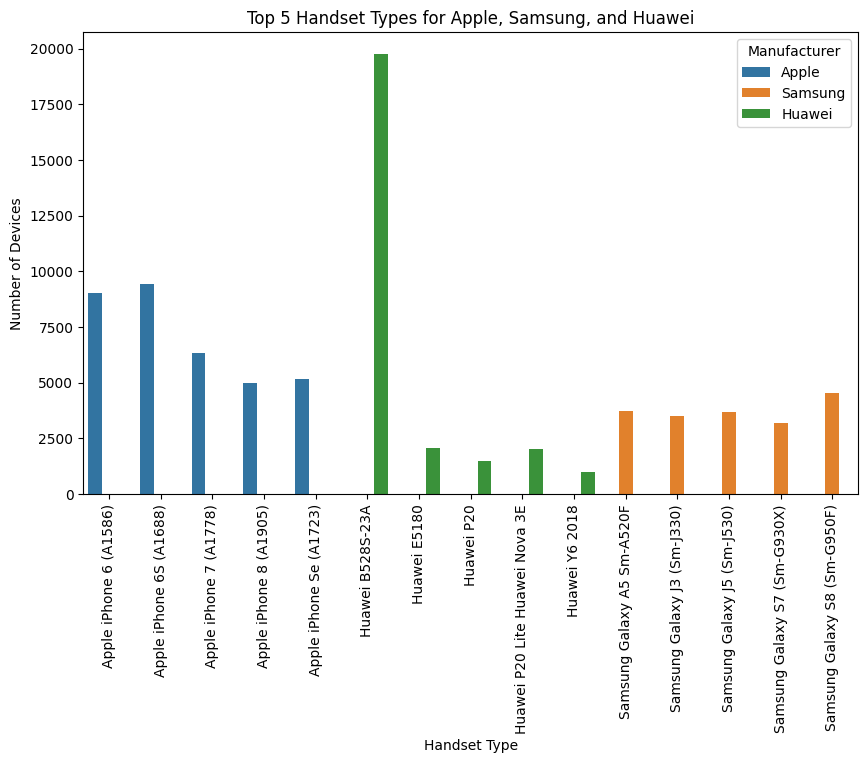

In [ ]:
data = pd.DataFrame({
    'Apple': apple,
    'Samsung': samsung,
    'Huawei': huawei
}).reset_index()

# Melt the DataFrame for seaborn compatibility
data_melted = pd.melt(data, id_vars=['Handset Type'], value_vars=['Apple', 'Samsung', 'Huawei'],
                      var_name='Manufacturer', value_name='Count')

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Handset Type', y='Count', hue='Manufacturer', data=data_melted)

# Setting the labels and title
plt.xlabel('Handset Type')
plt.ylabel('Number of Devices')
plt.title('Top 5 Handset Types for Apple, Samsung, and Huawei')

# Display the plot
plt.xticks(rotation=90)
plt.show()

**Interpretation:**
This data ranks the most popular handset models for three major manufacturers: Apple, Huawei, and Samsung. Here's a breakdown:

1. Apple Dominance:

a. Apple has the top 5 ranked handsets among its users, with the iPhone 6S (A1688) being the most popular, followed by the iPhone 6, 7, SE, and 8.

b. This suggests that Apple users predominantly use slightly older models, indicating strong customer retention for these devices.

2. Huawei's Key Models:

a. The Huawei B528S-23A is the most popular Huawei device, with other popular models being the Huawei E5180, P20 Lite (Nova 3E), P20, and Y6 2018.

b. This shows a diverse range of Huawei devices in use, spanning from older models to more recent ones.

3. Samsung's Popularity:

a. The Samsung Galaxy S8 (Sm-G950F) is the most popular Samsung device, followed by the Galaxy A5, J5, J3, and S7.

b. Similar to Apple, Samsung users are also using a mix of older models, with the Galaxy S8 being the most favored.

**Recommendations:**
1. Focus on Older Models: Since users across all three brands are predominantly using older models (like the iPhone 6S, Huawei B528S-23A, and Galaxy S8), ensure your services and apps are optimized for these devices. This may involve supporting older operating systems and device-specific features.

2. Targeted Marketing:

a. Apple: Since the iPhone 6S and iPhone 6 are the most popular, consider marketing strategies that highlight features or apps that work particularly well on these models.

b. Huawei: Focus on the B528S-23A and E5180, possibly offering promotions or services tailored to users of these devices.

c. Samsung: The Galaxy S8 and A5 are the top choices, so ensure any Samsung-focused initiatives are aimed at users of these models.
3. Device-Specific Support: Given the clear preferences for specific models within each brand, you should ensure that your technical support, FAQs, and user guides are tailored to these devices, addressing common issues or questions that users might have.

4. Future Trends: Monitor any changes in these rankings over time to see if newer models start to become more popular. This could indicate a shift in user preferences and help guide future product development or marketing strategies.

**Task 1.1**

**a. Number of xDR sessions per user**

In [ ]:
session_count = df.groupby('IMEI').agg({'Bearer Id': ['count']}).reset_index()
session_count[session_count['Bearer Id']['count'] > 10]

,IMEI,Bearer Id
,,count
321,3.515120e+13,13
328,3.515540e+13,454
329,3.515550e+13,394
330,3.515580e+13,339
337,3.515800e+13,51
...,...,...
3837,8.699070e+13,176
3840,8.699580e+13,45
3844,9.900020e+13,14


In [ ]:
result_df = df.groupby("MSISDN/Number").size().reset_index(name="NumberOfXDRSessions")
result_df.rename(columns={"MSISDN/Number": "UserIdentifer"}, inplace=True)
result_df = result_df.sort_values(by="NumberOfXDRSessions", ascending=False)
result_df

,UserIdentifer,NumberOfXDRSessions
13526,3.362632e+10,1083
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
...,...,...
41061,3.366068e+10,1
41059,3.366068e+10,1
41058,3.366067e+10,1
41057,3.366067e+10,1


**b. Average session Duration by Manufacturer**

In [ ]:
session_duration = df.groupby('MSISDN/Number').agg({'Dur. (ms)': ['sum']}).reset_index()

session_duration[session_duration['Dur. (ms)']['sum'] > 1000000]

,MSISDN/Number,Dur. (ms)
,,sum
480,3.360234e+10,1069729.0
666,3.360313e+10,6287761.0
1009,3.360371e+10,1050599.0
1279,3.360452e+10,5207990.0
1613,3.360648e+10,1561253.0
...,...,...
106137,3.378632e+10,4059652.0
106459,3.378757e+10,1081998.0
106571,3.378807e+10,1090180.0


In [ ]:
filtered_df = df[df["Handset Manufacturer"].isin(['Apple', 'Samsung', 'Huawei'])]
result_df = filtered_df.groupby("Handset Manufacturer")["Dur. (ms)"].mean().reset_index()
result_df.rename(columns={"Dur. (ms)": "Avg Session Duration (ms)"}, inplace=True)
result_df

,Handset Manufacturer,Avg Session Duration (ms)
0,Apple,98449.876264
1,Huawei,96095.559568
2,Samsung,121664.988467


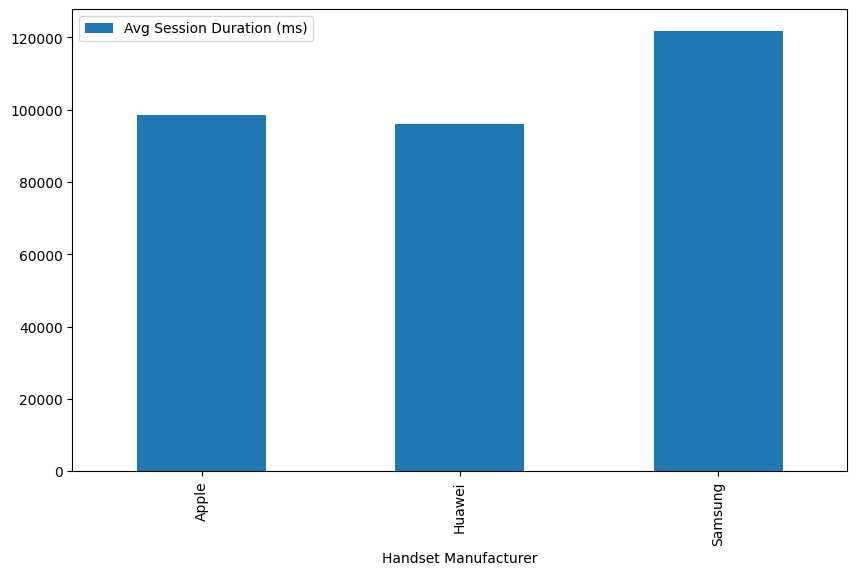

In [ ]:
plot=result_df.plot(kind='bar', x='Handset Manufacturer', y='Avg Session Duration (ms)', figsize=(10, 6))

**Top users by session duration**

In [ ]:
result_df = df.groupby("MSISDN/Number")["Dur. (ms)"].sum().reset_index()
result_df["TotalSessionDurationInSeconds"] = result_df["Dur. (ms)"] / 1000
result_df.rename(columns={"MSISDN/Number": "UserIdentifier"}, inplace=True)
result_df = result_df.sort_values(by="TotalSessionDurationInSeconds", ascending=False).reset_index(drop=True)
result_df[["UserIdentifier", "TotalSessionDurationInSeconds"]]

,UserIdentifier,TotalSessionDurationInSeconds
0,3.362632e+10,81238.323
1,3.362578e+10,18553.754
2,3.361489e+10,9966.898
3,3.376054e+10,9279.434
4,3.366716e+10,8744.914
...,...,...
106851,3.365043e+10,7.267
106852,3.369839e+10,7.258
106853,3.365933e+10,7.189
106854,3.366566e+10,7.146


**Peak usage Hours**

In [ ]:
df["Start"] = pd.to_datetime(df["Start"], errors='coerce')
df["HourOfDay"] = df["Start"].dt.hour
filtered_df = df[df["Start"].notna()]
result_df = filtered_df.groupby("HourOfDay").size().reset_index(name="NumberOfSessions")
result_df = result_df.sort_values(by="NumberOfSessions", ascending=False).reset_index(drop=True)
result_df

,HourOfDay,NumberOfSessions
0,7,14176
1,8,9065
2,6,8513
3,2,8296
4,4,8114
5,20,7232
6,16,7204
7,3,7170
8,17,6997
9,1,6834


**c. The total download (DL) and upload (UL) data**

In [ ]:
total_download_upload = df.groupby('MSISDN/Number').agg(
    {'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'})

total_download_upload

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197020e+12,1.948281e+08,37295915.0


**d. Data volume Analysis by Manufacturer**

In [ ]:
filtered_df = df[df["Handset Manufacturer"].isin(['Apple', 'Samsung', 'Huawei'])]
filtered_df["Total Data Volume (Bytes)"] = filtered_df["Total UL (Bytes)"] + filtered_df["Total DL (Bytes)"]
result_df = filtered_df.groupby("Handset Manufacturer")["Total Data Volume (Bytes)"].sum().reset_index()
result_df

,Handset Manufacturer,Total Data Volume (Bytes)
0,Apple,2.978488e+13
1,Huawei,1.709393e+13
2,Samsung,2.023676e+13


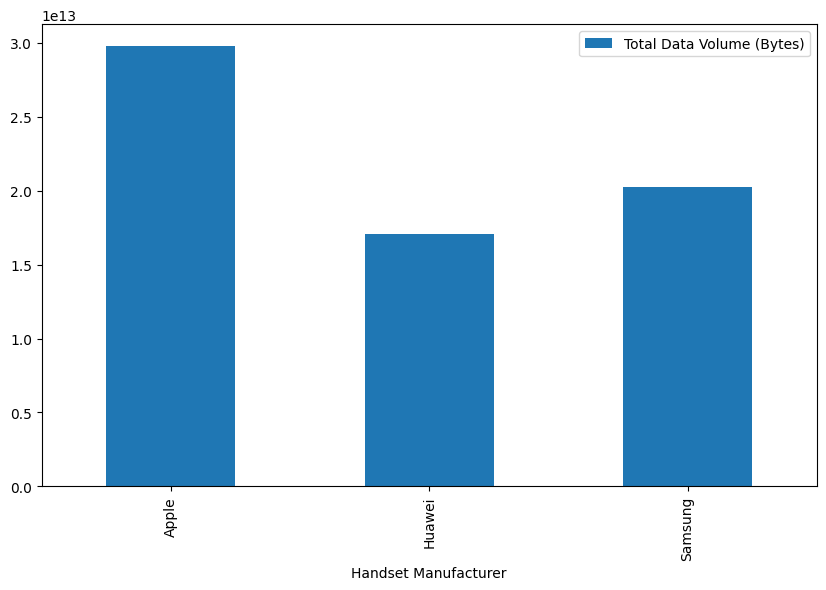

In [ ]:
plot=result_df.plot(kind='bar', x='Handset Manufacturer', y='Total Data Volume (Bytes)', figsize=(10, 6))

**Total data per user**

In [ ]:
def get_total_download_for_each_app(df, download_col, upload_col):
    # Calculate the total data volume (download + upload)
    df['Total Data (Bytes)'] = df[download_col] + df[upload_col]

    if 'App' in df.columns:
        total_download_by_app = df.groupby('App')['Total Data (Bytes)'].sum().reset_index()
    else:
        # If there is no 'App' column, just return the total data calculated
        total_download_by_app = df[['Total Data (Bytes)']]

    return total_download_by_app


**Total social media download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Social Media DL (Bytes)", "Social Media UL (Bytes)")
combined_result = pd.concat([df["Social Media DL (Bytes)"], df["Social Media UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Social Media DL (Bytes)  Social Media UL (Bytes)  Total Data (Bytes)
0                     1545765.0                  24420.0           1570185.0
1                     1926113.0                   7165.0           1933278.0
2                     1684053.0                  42224.0           1726277.0
3                      644121.0                  13372.0            657493.0
4                      862600.0                  50188.0            912788.0
...                         ...                      ...                 ...
149995                 962097.0                  31078.0            993175.0
149996                3464974.0                  52091.0           3517065.0
149997                2344568.0                   7613.0           2352181.0
149998                1245845.0                  14394.0           1260239.0
149999                 801547.0                  21562.0            823109.0

[150000 rows x 3 columns]


**Total Youtube download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Youtube DL (Bytes)", "Youtube UL (Bytes)")
combined_result = pd.concat([df["Youtube DL (Bytes)"], df["Youtube UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Youtube DL (Bytes)  Youtube UL (Bytes)  Total Data (Bytes)
0               15854611.0           2501332.0          18355943.0
1               20247395.0          19111729.0          39359124.0
2               19725661.0          14699576.0          34425237.0
3               21388122.0          15146643.0          36534765.0
4               15259380.0          18962873.0          34222253.0
...                    ...                 ...                 ...
149995           6550499.0          18003146.0          24553645.0
149996          16191667.0          11763428.0          27955095.0
149997          13877234.0           8288284.0          22165518.0
149998          22660510.0           1855903.0          24516413.0
149999           8817106.0           8305402.0          17122508.0

[150000 rows x 3 columns]


**Total Netflix download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Netflix DL (Bytes)", "Netflix UL (Bytes)")
combined_result = pd.concat([df["Netflix DL (Bytes)"], df["Netflix UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Netflix DL (Bytes)  Netflix UL (Bytes)  Total Data (Bytes)
0                8198936.0           9656251.0          17855187.0
1               18338413.0          17227132.0          35565545.0
2               17587794.0           6163408.0          23751202.0
3               13994646.0           1097942.0          15092588.0
4               17124581.0            415218.0          17539799.0
...                    ...                 ...                 ...
149995          22468983.0           7149728.0          29618711.0
149996          17883703.0          19678161.0          37561864.0
149997          19350146.0          21293148.0          40643294.0
149998           9963942.0           5065760.0          15029702.0
149999           3322253.0          13172589.0          16494842.0

[150000 rows x 3 columns]


 **Total Google download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Google DL (Bytes)", "Google UL (Bytes)")
combined_result = pd.concat([df["Google DL (Bytes)"], df["Google UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Google DL (Bytes)  Google UL (Bytes)  Total Data (Bytes)
0               1634479.0          1271433.0           2905912.0
1               3493924.0           920172.0           4414096.0
2               8535055.0          1694064.0          10229119.0
3               9023734.0          2788027.0          11811761.0
4               6248284.0          1500559.0           7748843.0
...                   ...                ...                 ...
149995          1139573.0           126061.0           1265634.0
149996          9967603.0          2817311.0          12784914.0
149997          2229420.0          2185941.0           4415361.0
149998          3850890.0          2734579.0           6585469.0
149999          4189773.0          3567494.0           7757267.0

[150000 rows x 3 columns]


**Total Email download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Email DL (Bytes)", "Email UL (Bytes)")
combined_result = pd.concat([df["Email DL (Bytes)"], df["Email UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Email DL (Bytes)  Email UL (Bytes)  Total Data (Bytes)
0              3563542.0          137762.0           3701304.0
1               629046.0          308339.0            937385.0
2              2690151.0          672973.0           3363124.0
3              1439754.0          631229.0           2070983.0
4              1936496.0          173853.0           2110349.0
...                  ...               ...                 ...
149995         3459965.0          820142.0           4280107.0
149996           57639.0          633237.0            690876.0
149997         1954414.0          167304.0           2121718.0
149998         1525734.0          532543.0           2058277.0
149999         2228270.0          622644.0           2850914.0

[150000 rows x 3 columns]


**Total gaming download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Gaming DL (Bytes)", "Gaming UL (Bytes)")
combined_result = pd.concat([df["Gaming DL (Bytes)"], df["Gaming UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Gaming DL (Bytes)  Gaming UL (Bytes)  Total Data (Bytes)
0             278082303.0         14344150.0         292426453.0
1             608750074.0          1170709.0         609920783.0
2             229584621.0           395630.0         229980251.0
3             799538153.0         10849722.0         810387875.0
4             527707248.0          3529801.0         531237049.0
...                   ...                ...                 ...
149995        784435351.0         12724751.0         797160102.0
149996        526609673.0          9197207.0         535806880.0
149997        626893062.0          4735033.0         631628095.0
149998        553539484.0         13394316.0         566933800.0
149999        352536971.0          2529475.0         355066446.0

[150000 rows x 3 columns]


**Other download and upload per user**

In [ ]:
result_df = get_total_download_for_each_app(df, "Other DL (Bytes)", "Other UL (Bytes)")
combined_result = pd.concat([df["Other DL (Bytes)"], df["Other UL (Bytes)"], result_df], axis=1)
print(combined_result)

        Other DL (Bytes)  Other UL (Bytes)  Total Data (Bytes)
0            171744450.0         8814393.0         180558843.0
1            526904238.0        15055145.0         541959383.0
2            410692588.0         4215763.0         414908351.0
3            749039933.0        12797283.0         761837216.0
4            550709500.0        13910322.0         564619822.0
...                  ...               ...                 ...
149995       321383162.0        14890486.0         336273648.0
149996         3264510.0        13487416.0          16751926.0
149997       712180387.0         2457758.0         714638145.0
149998       121100856.0        11314729.0         132415585.0
149999       814713113.0         1406930.0         816120043.0

[150000 rows x 3 columns]


**Task 1.2**

**Handle outliers**

In [ ]:
df.shape

(150000, 55)

In [ ]:
def handle_outliers(df, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((df[column] - np.mean(df[column])) / np.std(df[column]))
        outliers = z_scores > threshold
        df.loc[outliers, column] = np.median(df[column])
    return df

In [ ]:
quantitative_columns = [
    "Avg RTT DL (ms)",
    "Avg RTT UL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Dur. (ms).1",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total DL (Bytes)",
    "Total UL (Bytes)"
]

# Apply the outlier handling function to the dataframe
df = handle_outliers(df, quantitative_columns)

In [ ]:
df.shape

(150000, 55)

In [ ]:
descriptive_stats = df[quantitative_columns].describe()
descriptive_stats

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),...,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,140405.000000,139796.000000,150000.000000,150000.000000,1.471260e+05,1.485050e+05,128213.000000,132603.000000,113760.000000,121424.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,62.956254,10.036835,11052.065507,1102.592880,1.374815e+07,5.257551e+05,97.463144,1.226369,0.084442,0.079902,...,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.546434e+08,4.112098e+07
std,35.744985,8.480360,18914.973139,2458.825594,9.567587e+06,3.396496e+05,4.831560,2.364126,0.292347,0.282142,...,3.309108e+06,1.189921e+06,1.035843e+06,269970.206933,2.439683e+08,4.782716e+06,2.432058e+08,4.769020e+06,2.441429e+08,1.125639e+07
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,81.000000,0.000000,0.000000,0.000000,...,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.114041e+06,7.324119e+06
25%,34.000000,3.000000,43.000000,47.000000,1.224046e+06,6.066600e+04,98.000000,0.000000,0.000000,0.000000,...,2.882380e+06,1.024274e+06,8.927808e+05,233379.750000,2.104706e+08,4.128424e+06,2.101824e+08,4.145904e+06,2.431068e+08,3.322840e+07
50%,50.000000,6.000000,63.000000,63.000000,2.080991e+07,7.596587e+05,100.000000,0.000000,0.000000,0.000000,...,5.765857e+06,2.054569e+06,1.793534e+06,466246.000000,4.234082e+08,8.291215e+06,4.218057e+08,8.267086e+06,4.558411e+08,4.114331e+07
75%,108.000000,17.662883,16900.000000,904.000000,2.080991e+07,7.596587e+05,100.000000,1.000000,0.000000,0.000000,...,8.623579e+06,3.088454e+06,2.689329e+06,700441.500000,6.331747e+08,1.243163e+07,6.316950e+08,1.238420e+07,6.657055e+08,4.902673e+07
max,181.000000,36.000000,85214.000000,15639.000000,4.287825e+07,1.551820e+06,100.000000,9.000000,1.717341,1.609654,...,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,9.029696e+08,7.483343e+07


**Graphical Univarate analysis**

**Histogram of AvgRTT DL(ms)**

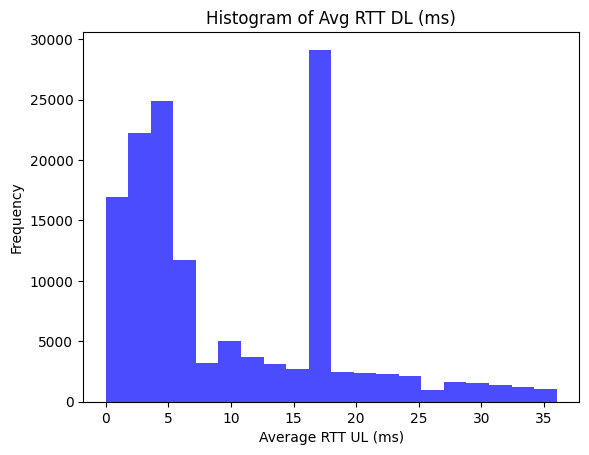

In [ ]:
plt.hist(df['Avg RTT UL (ms)'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Average RTT UL (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Avg RTT DL (ms)')
plt.show()

Right Skewness:
The right-skewed shape indicates that the majority of users experience relatively lower values of Avg RTT DL.

Long Bin at the Center:

A long bin at the center means that there is a concentration of users with similar or central values of Avg RTT DL.

**Boxplot of Avg Bearer TP DL(kbps)**

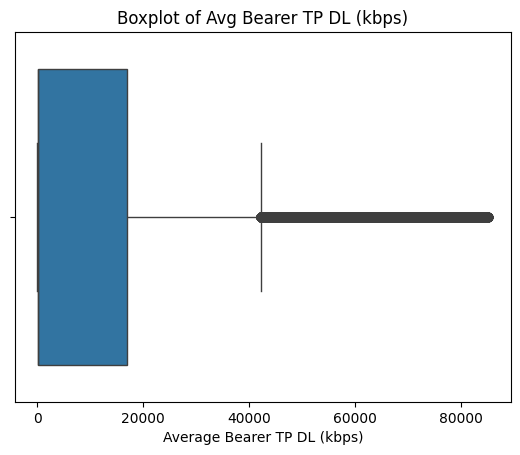

In [ ]:
sns.boxplot(x=df['Avg Bearer TP DL (kbps)'])
plt.xlabel('Average Bearer TP DL (kbps)')
plt.title('Boxplot of Avg Bearer TP DL (kbps)')
plt.show()

**Bar chart of Handset Type**

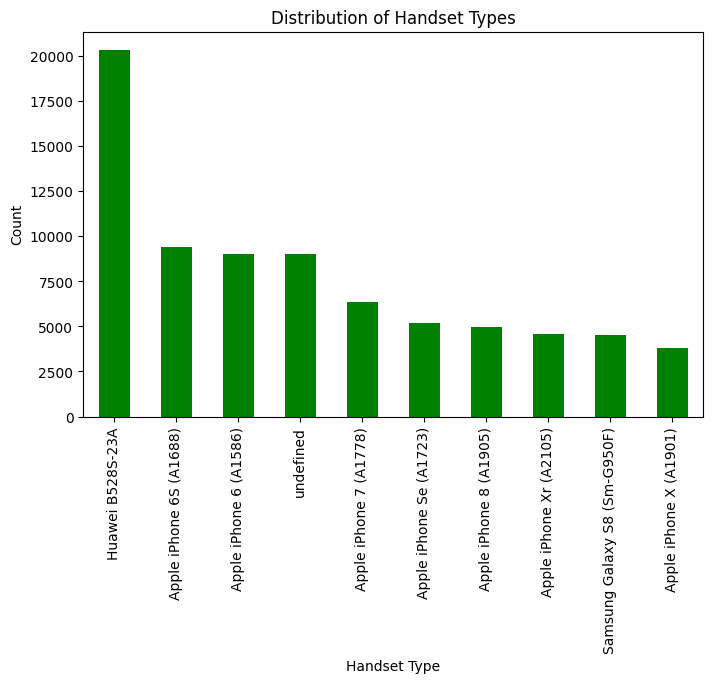

In [ ]:
plt.figure(figsize=(8, 5))
df['Handset Type'].value_counts().head(10).plot(kind='bar', color='green')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Distribution of Handset Types')
plt.show()

**correlation Analysis**

In [ ]:
correlation_matrix = df[
    [
        "Social Media DL (Bytes)",
        "Social Media UL (Bytes)",
        "Youtube DL (Bytes)",
        "Youtube UL (Bytes)",
        "Netflix DL (Bytes)",
        "Netflix UL (Bytes)",
        "Google DL (Bytes)",
        "Google UL (Bytes)",
        "Email DL (Bytes)",
        "Email UL (Bytes)",
        "Gaming DL (Bytes)",
        "Gaming UL (Bytes)",
        "Other DL (Bytes)",
        "Other UL (Bytes)",
        "Total DL (Bytes)",
        "Total UL (Bytes)"
]].corr()
correlation_matrix

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
Social Media DL (Bytes),1.000000,-0.000555,-0.001389,0.002345,-0.001817,0.003457,-0.001954,0.000186,0.004745,-0.002518,0.001018,0.003095,0.006126,0.000610,0.005164,0.004760
Social Media UL (Bytes),-0.000555,1.000000,-0.001786,-0.002368,-0.000772,-0.002493,0.003542,0.001085,0.004823,-0.001427,0.000210,0.000844,-0.003850,0.000971,0.000206,-0.000073
Youtube DL (Bytes),-0.001389,-0.001786,1.000000,0.002433,0.001202,0.001746,0.001760,0.001122,0.001679,-0.000320,-0.001861,-0.001893,0.002042,-0.004830,0.025685,-0.000457
Youtube UL (Bytes),0.002345,-0.002368,0.002433,1.000000,0.000423,0.002477,0.000638,0.001670,-0.004305,-0.006834,-0.002382,0.000898,0.002296,-0.001393,-0.002301,0.563157
Netflix DL (Bytes),-0.001817,-0.000772,0.001202,0.000423,1.000000,0.001065,0.000548,-0.001288,0.001351,-0.000011,-0.003201,-0.000633,-0.006000,-0.002588,0.024386,-0.000923
Netflix UL (Bytes),0.003457,-0.002493,0.001746,0.002477,0.001065,1.000000,-0.001569,-0.004073,-0.000016,0.000532,-0.001051,-0.004015,-0.006691,-0.003447,-0.000979,0.561013
Google DL (Bytes),-0.001954,0.003542,0.001760,0.000638,0.000548,-0.001569,1.000000,-0.000103,-0.000039,0.000742,-0.001421,-0.001429,-0.002557,-0.000882,0.012189,-0.001384
Google UL (Bytes),0.000186,0.001085,0.001122,0.001670,-0.001288,-0.004073,-0.000103,1.000000,-0.001157,-0.002050,0.001140,-0.002516,0.002097,-0.002219,0.001129,0.101162
Email DL (Bytes),0.004745,0.004823,0.001679,-0.004305,0.001351,-0.000016,-0.000039,-0.001157,1.000000,0.002553,0.000050,-0.004335,-0.000444,0.004675,0.004395,-0.002234
Email UL (Bytes),-0.002518,-0.001427,-0.000320,-0.006834,-0.000011,0.000532,0.000742,-0.002050,0.002553,1.000000,-0.002519,0.005000,-0.003805,0.000081,-0.002516,0.022008


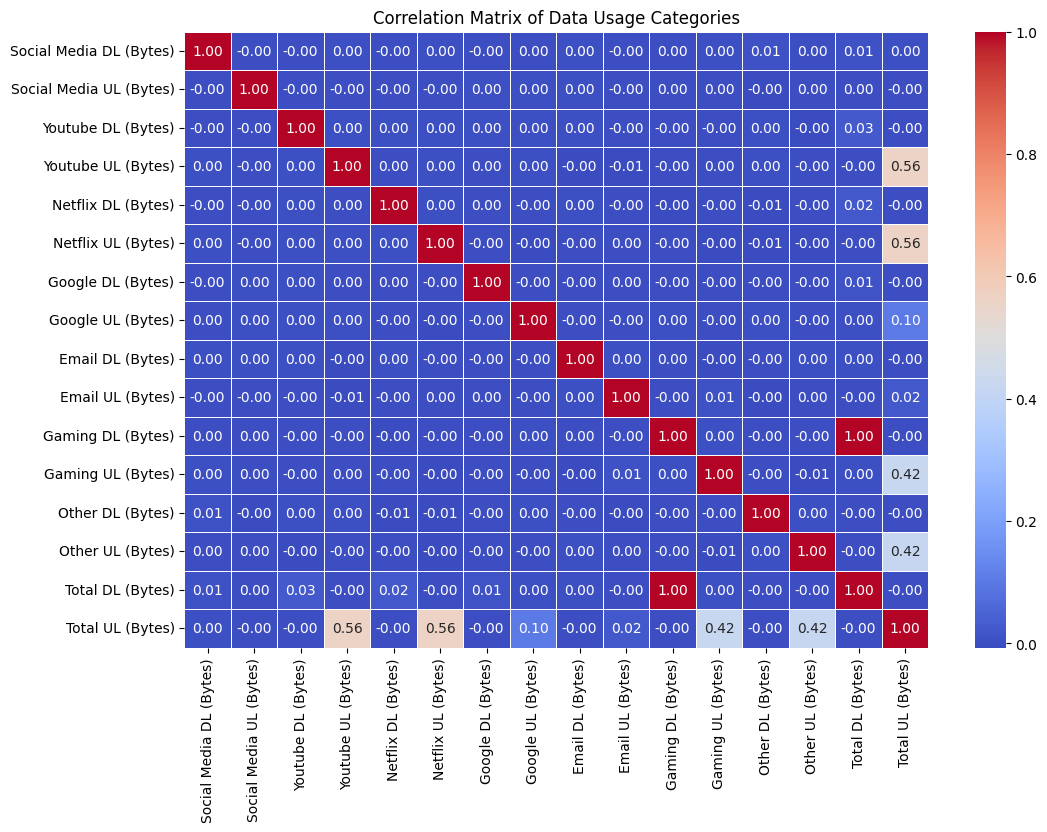

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Data Usage Categories")
plt.show()

A correlation close to 1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates a weak relationship.

**Bivariate Plot**

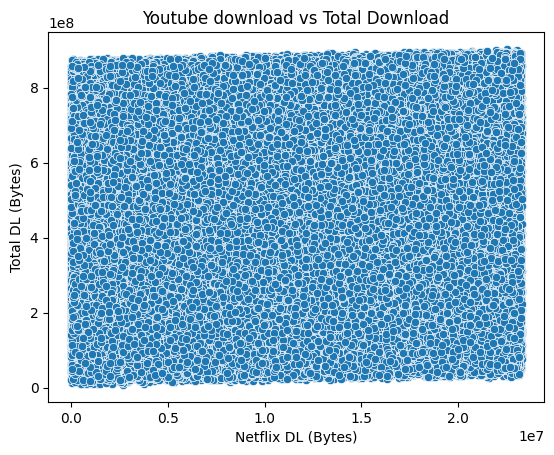

In [42]:
sns.scatterplot(x='Netflix DL (Bytes)', y='Total DL (Bytes)', data=df)
plt.title('Youtube download vs Total Download')
plt.show()